# Вариант 7. Распределение Пуассона.

In [13]:
import numpy as np
from scipy.stats import poisson
from math import exp
import matplotlib.pyplot as plt

Оценка $\hat{\theta}_n = \overline{x} \exp^{-\overline{x}} $

## Состоятельность

Для параметра $\theta$ состоятельной оценкой будет $\overline{x}$. Рассмотрим непрерывную функцию $f(x) = x e^{-x}$. $\overline{x} \xrightarrow[n \rightarrow \infty]{p} \theta$ и $e^{-\overline{x}}  \xrightarrow[n \rightarrow \infty]{p} e^{-\theta}$. Тогда ссылаясь на известное утверждение(забыл как называется) $\overline{x} e^{-\overline{x}} \xrightarrow[n \rightarrow \infty]{p} \theta e^{-\theta} $

## Моделирование состоятельности

In [61]:
mu = 0.6 # параметр лямбда
true_meaning = 0.6 * exp(-mu) # теоретическое значение
n = 1000 # объем выборки

In [62]:
rv = poisson.rvs(mu, size=n) # смоделируем случайные значения распределения пуассона

model_means = [np.mean(rv[:i + 1]) for i in range(n)] # посчитаем выборочное среднее для первых i элементов, i = 1, n

На графике покажем как эмпирическое значение оценки при росте n стремится к теоретическому значению

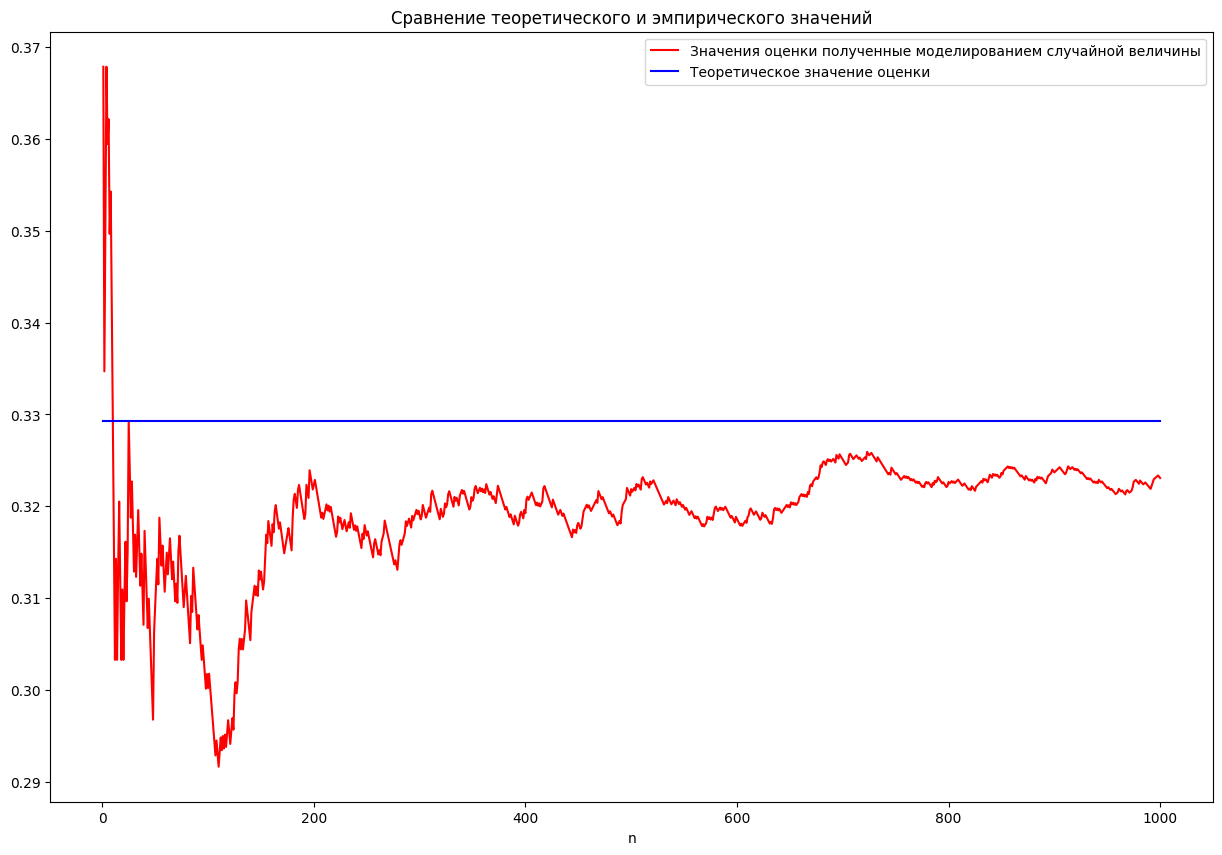

In [75]:
plt.figure(figsize=(15,10))

model_evaluations = [e * exp(-e) for e in model_means]
plt.plot(list(range(1, n + 1)), model_evaluations, color='r', label='Значения оценки полученные моделированием случайной величины')
plt.plot(list(range(1, n + 1)), [true_meaning] * n, color='b', label='Теоретическое значение оценки')

plt.xlabel("n")
plt.title("Сравнение теоретического и эмпирического значений")

plt.legend()
plt.show()

Вывод: доказали состоятельность оценки и моделированием наглядно показали что эмпирическое значение оценки стремится к теоретическому с ростом n

## Асимптотическая несмещенность

$  E\hat{\theta}_n = \sum\limits_{k = 0}^{\infty} \dfrac{k}{n} e^{-\dfrac{k}{n}} \dfrac{(n\theta)^k}{k!} e^{-n\theta} = \dfrac{e^{-n\theta}}{n} \sum\limits_{k = 1}{\infty} \dfrac{(n\theta e^{-\frac{1}{n}})^k}{(k - 1!)} = \theta e^{n\theta (e^{-1/n}) - 1/n} \xrightarrow[n \rightarrow \infty]{} \hat{\theta}$

## Моделирование

In [64]:
mu = 0.6 # параметр лямбда
true_meaning = 0.6 * exp(-mu) # теоретическое значение
n = 1000 # объем выборки

In [67]:
rv = poisson.rvs(mu, size=n) # смоделируем случайные значения распределения пуассона

model_means = [np.mean(rv[:i + 1]) for i in range(n)] # посчитаем выборочное среднее для первых i элементов, i = 1, n
model_evaluations = [e * exp(-e) for e in model_means] # посчитаем эмпирические значения оценки для первых i элементов, i = 1, n

Теперь на графике изобразим мат ожидание оценки для различных n

In [72]:
model_evaluations_means = [np.mean(model_evaluations[:i + 1]) for i in range(n)]

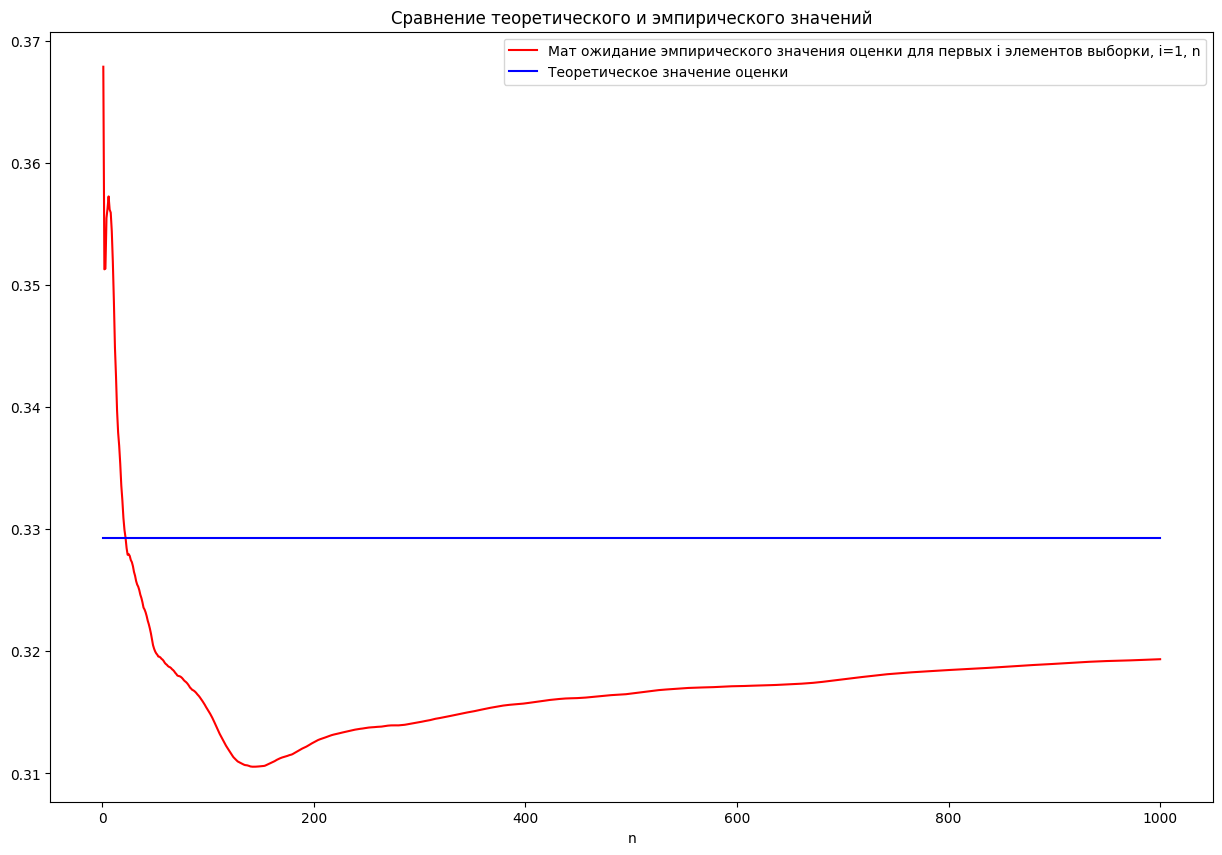

In [74]:
plt.figure(figsize=(15,10))

plt.plot(list(range(1, n + 1)), model_evaluations_means, color='r', label='Мат ожидание эмпирического значения оценки для первых i элементов выборки, i=1, n')
plt.plot(list(range(1, n + 1)), [true_meaning] * n, color='b', label='Теоретическое значение оценки')

plt.xlabel("n")
plt.title("Сравнение теоретического и эмпирического значений")

plt.legend()
plt.show()

Вывод: было доказана асимптотическая несмещенность оценки и моделированием показано что мат ожидание оценки при росте n стремится к теоретическому значению